In [1]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style('ticks')
import matplotlib.font_manager
for font in matplotlib.font_manager.findSystemFonts(
    '/Users/deepak/Library/Fonts/'):
    matplotlib.font_manager.fontManager.addfont(font)
font = {
    #'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 8,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

In [2]:
def read_logfile(logfile_name):
    values = {}
    value_labels = ['LN1', 'QKV', 'AttScore', 'AttSoftmax', 'AttDropout', 'AOV',
                    'AttLinproj', 'PADropout', 'PAResidual','LN2','MLP_h_4h','MLP_4h_h',
                    'PostMLPResidual', 'other']
    for x in value_labels:
        values[x]=0
    total=0

    with open(logfile_name, 'r') as f:
        for line in f:
            line = line.strip()

            
            match = re.match(r'LN1: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["LN1"] += latency

            match = re.match(r'QKV Transform: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["QKV"] += latency

            match = re.match(r'Attention Score: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["AttScore"] += latency

            match = re.match(r'Attention Softmax: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["AttSoftmax"] += latency

            match = re.match(r'Attention Dropout: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["AttDropout"] += latency

            match = re.match(r'Attention Over Value: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["AOV"] += latency

            match = re.match(r'Attention linproj: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["AttLinproj"] += latency
            
            match = re.match(r'Post-attention Dropout: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["PADropout"] += latency

            match = re.match(r'Post-attention residual: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["PAResidual"] += latency

            match = re.match(r'LN2: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["LN2"] += latency
            
            match = re.match(r'MLP_h_4h: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["MLP_h_4h"] += latency
            
            match = re.match(r'MLP_4h_h: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["MLP_4h_h"] += latency
            
            match = re.match(r'Post-MLP residual: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["PostMLPResidual"] += latency

            match = re.match(r'Attention layer time: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                total += latency
    for x in value_labels:
        values[x]/=1
    total /=1
    values['other'] = total - sum(values[item] for item in values)
    return values


14
14


/tmp/ipykernel_4019096/3138056622.py:87: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  values['other'] = total - sum(values[item] for item in values)


([<matplotlib.patches.Wedge at 0x7eff1872fe50>,
 [Text(3.298276274196398, 0.10664717095698294, 'Layer Norm 1'),
  Text(2.903993997977307, 1.5674242755909387, 'QKV Transform'),
  Text(1.3152757461768763, 3.0265574026472493, 'Attention Score Computation'),
  Text(-1.2003503438469876, 3.073948446546627, 'Attention Softmax'),
  Text(-2.6490548342134947, 1.9678690213858538, 'Attention Dropout'),
  Text(-2.94794292092317, 1.483115819812792, 'Attention Over Value'),
  Text(-3.2624396172096475, 0.4964753206967792, 'Post-Attention Linear Projection'),
  Text(-3.2452610983142702, -0.5985652878074856, 'Post-attention dropout'),
  Text(-3.0493959694494066, -1.2614215082618954, 'Post-attention residual'),
  Text(-2.969629063973861, -1.4392022868247991, 'Layer Norm 2'),
  Text(-1.4823291834706394, -2.9483385476961885, 'MLP h to 4h'),
  Text(2.1201067588108424, -2.5288628533877806, 'MLP 4h to h'),
  Text(3.1948188797721824, -0.8265181942650867, 'Post-MLP residual'),
  Text(3.288020929117061, -0.28092

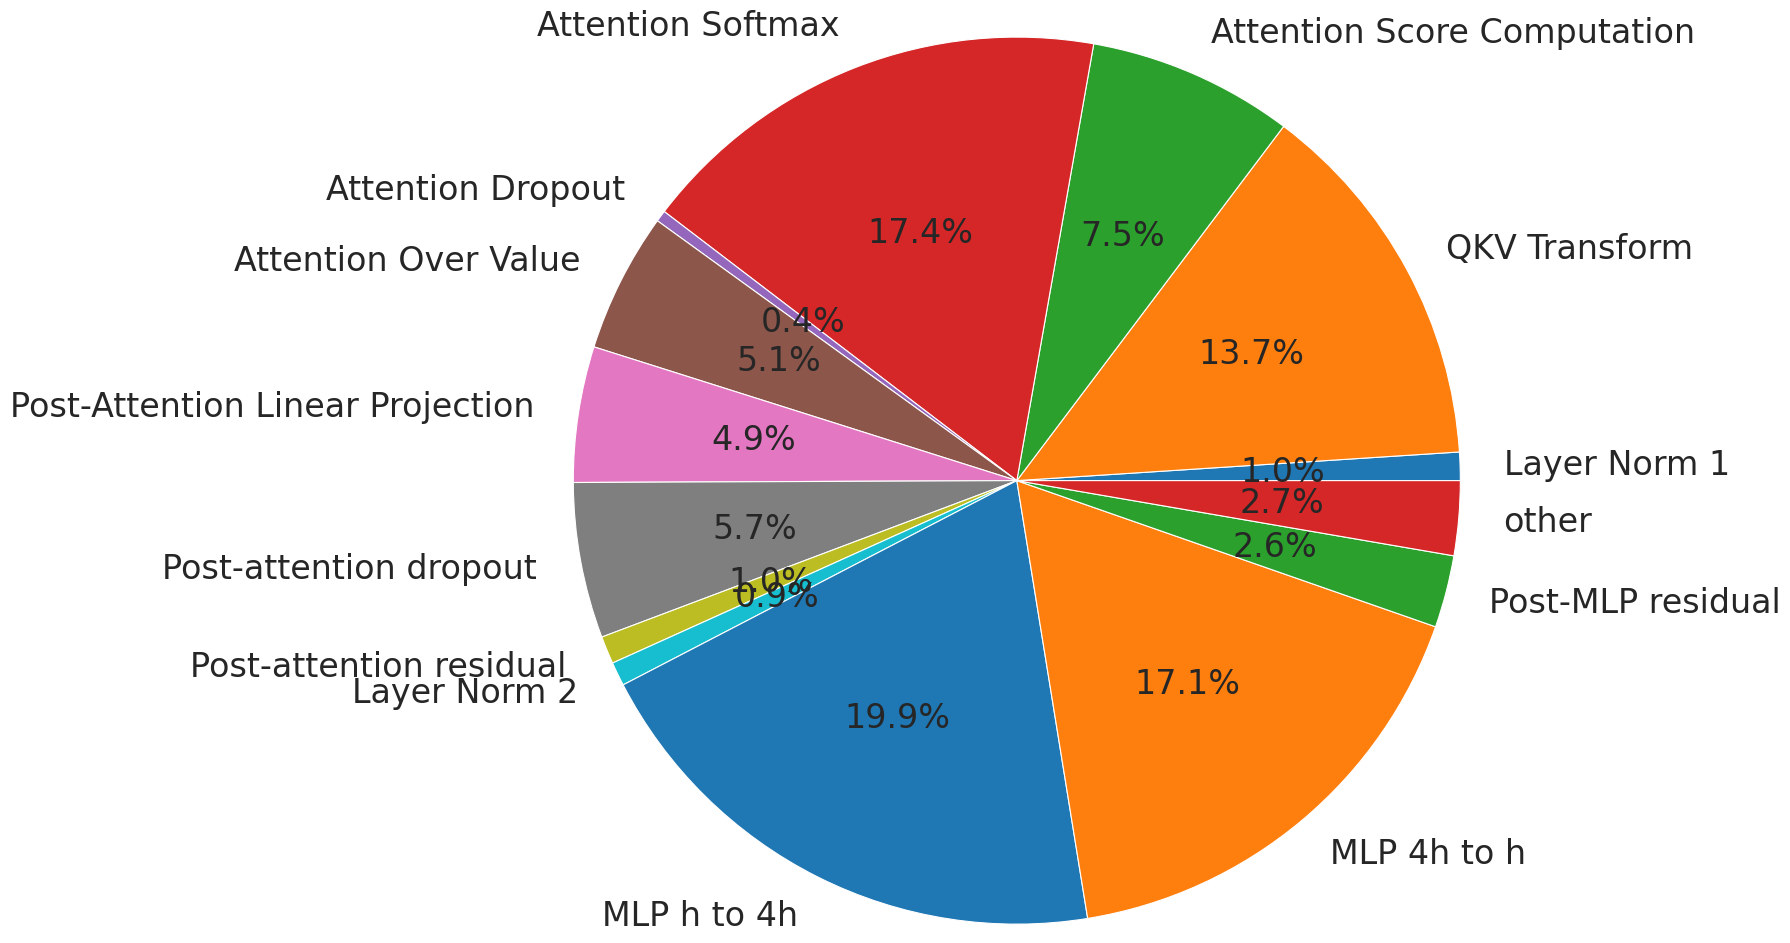

In [3]:
value_labels = ['LN1', 'QKV', 'AttScore', 'AttSoftmax', 'AttDropout', 'AOV','AttLinproj', 'PADropout', 'PAResidual','LN2','MLP_h_4h','MLP_4h_h','PostMLPResidual', 'other']
labels = ['Layer Norm 1', 'QKV Transform', 'Attention Score Computation','Attention Softmax','Attention Dropout', 'Attention Over Value', 'Post-Attention Linear Projection','Post-attention dropout','Post-attention residual', 'Layer Norm 2', 'MLP h to 4h', 'MLP 4h to h','Post-MLP residual','other']
print(len(value_labels))
print(len(labels))
sizes = read_logfile("results/individual_latency.out")

fig, ax = plt.subplots()
ax.pie(sizes.values(), autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=3,labels=labels)

14
14


/tmp/ipykernel_4019096/3138056622.py:87: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  values['other'] = total - sum(values[item] for item in values)


([<matplotlib.patches.Wedge at 0x7eff15fa65b0>,
 [Text(3.2999316402802914, 0.02124075038755325, 'Layer Norm 1'),
  Text(2.494480595441981, 2.1604551740231557, 'QKV Transform'),
  Text(0.059605003423183166, 3.2994616596600914, 'Attention Score Computation'),
  Text(-0.6144660463287301, 3.2422880004572603, 'Attention Softmax'),
  Text(-0.833006212233954, 3.1931333593164632, 'Attention Dropout'),
  Text(-0.9005056796165519, 3.174758183071324, 'Attention Over Value'),
  Text(-1.6424241701463362, 2.8622443720477677, 'Post-Attention Linear Projection'),
  Text(-2.2762119204054536, 2.38932193172124, 'Post-attention dropout'),
  Text(-2.327032500509673, 2.3398546411201924, 'Post-attention residual'),
  Text(-2.353425249620062, 2.3133070687763766, 'Layer Norm 2'),
  Text(-3.2614961479120703, -0.5026359290328626, 'MLP h to 4h'),
  Text(1.5281680683756822, -2.924842278618958, 'MLP 4h to h'),
  Text(3.2844052025081507, -0.3204410487708992, 'Post-MLP residual'),
  Text(3.29729969330782, -0.13347184

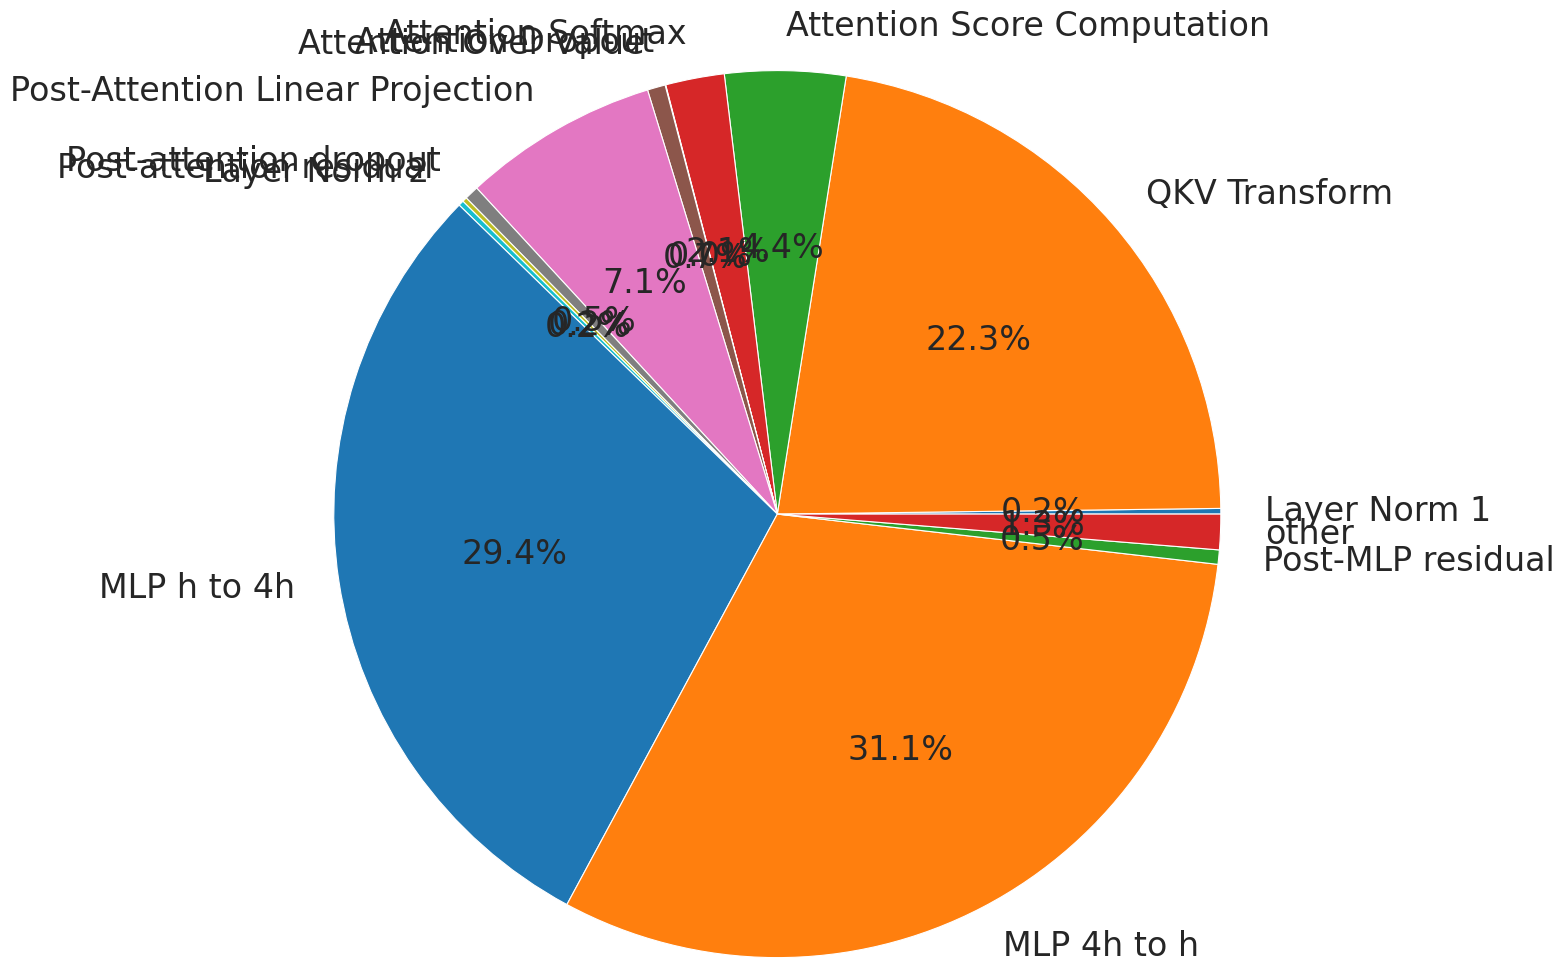

In [4]:
value_labels = ['LN1', 'QKV', 'AttScore', 'AttSoftmax', 'AttDropout', 'AOV','AttLinproj', 'PADropout', 'PAResidual','LN2','MLP_h_4h','MLP_4h_h','PostMLPResidual', 'other']
labels = ['Layer Norm 1', 'QKV Transform', 'Attention Score Computation','Attention Softmax','Attention Dropout', 'Attention Over Value', 'Post-Attention Linear Projection','Post-attention dropout','Post-attention residual', 'Layer Norm 2', 'MLP h to 4h', 'MLP 4h to h','Post-MLP residual','other']
print(len(value_labels))
print(len(labels))
sizes = read_logfile("results/individual_latency_large.out")

fig, ax = plt.subplots()
ax.pie(sizes.values(), autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=3,labels=labels)

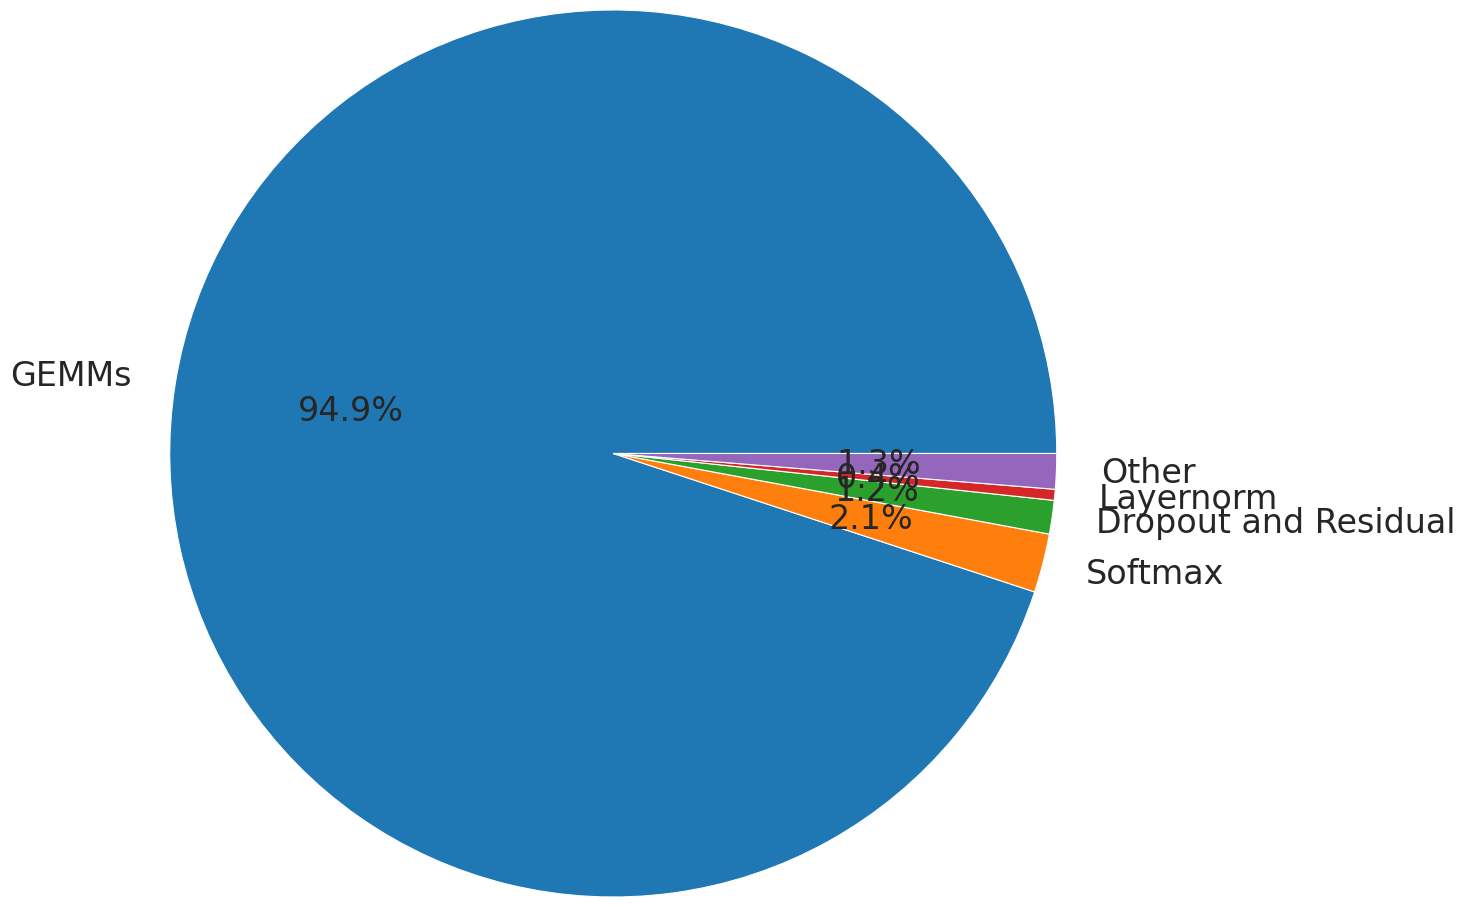

In [5]:
labels = ["GEMMs", "Softmax", "Dropout and Residual","Layernorm","Other"]
gemms=0
for key in ['QKV', 'AttScore', 'AOV','AttLinproj','MLP_h_4h','MLP_4h_h']:
    gemms+=sizes[key]
softmax = 0
for key in ['AttSoftmax']:
    softmax+=sizes[key]
drop_res = 0
for key in ['AttDropout', 'PADropout', 'PAResidual','PostMLPResidual']:
    drop_res+=sizes[key]
layernorm=0
for key in ['LN1', 'LN2']:
    layernorm+=sizes[key]

latencies=[gemms,softmax,drop_res,layernorm,sizes["other"]]

fig, ax = plt.subplots()
ax.pie(latencies, autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=3,labels=labels)
plt.savefig("large_gemms_prop_fig.png")


([<matplotlib.patches.Wedge at 0x7eff15ea68e0>,
 [Text(2.5220852609030033, 2.128164922353489, 'QKV Transform'),
  Text(0.10207375534622608, 3.298420978054427, 'Attention Score Computation'),
  Text(-0.42036053990232214, 3.273117323973131, 'Attention Over Value'),
  Text(-1.2003827486921503, 3.0739357925373585, 'Post-Attention Linear Projection'),
  Text(-3.2957263394755847, 0.1678925111101262, 'MLP h to 4h'),
  Text(0.904552812409653, -3.173607444149605, 'MLP 4h to h'),
  Text(3.258529017080982, -0.5215253060410859, 'Non-GEMM')],
 [Text(1.375682869583456, 1.16081723037463, '22.3%'),
  Text(0.05567659382521421, 1.7991387153024143, '4.4%'),
  Text(-0.2292875672194484, 1.7853367221671619, '0.7%'),
  Text(-0.6547542265593547, 1.6766922504749227, '7.1%'),
  Text(-1.7976689124412277, 0.0915777333327961, '29.4%'),
  Text(0.49339244313253794, -1.7310586058997843, '31.1%'),
  Text(1.7773794638623537, -0.2844683487496832, '5.1%')])

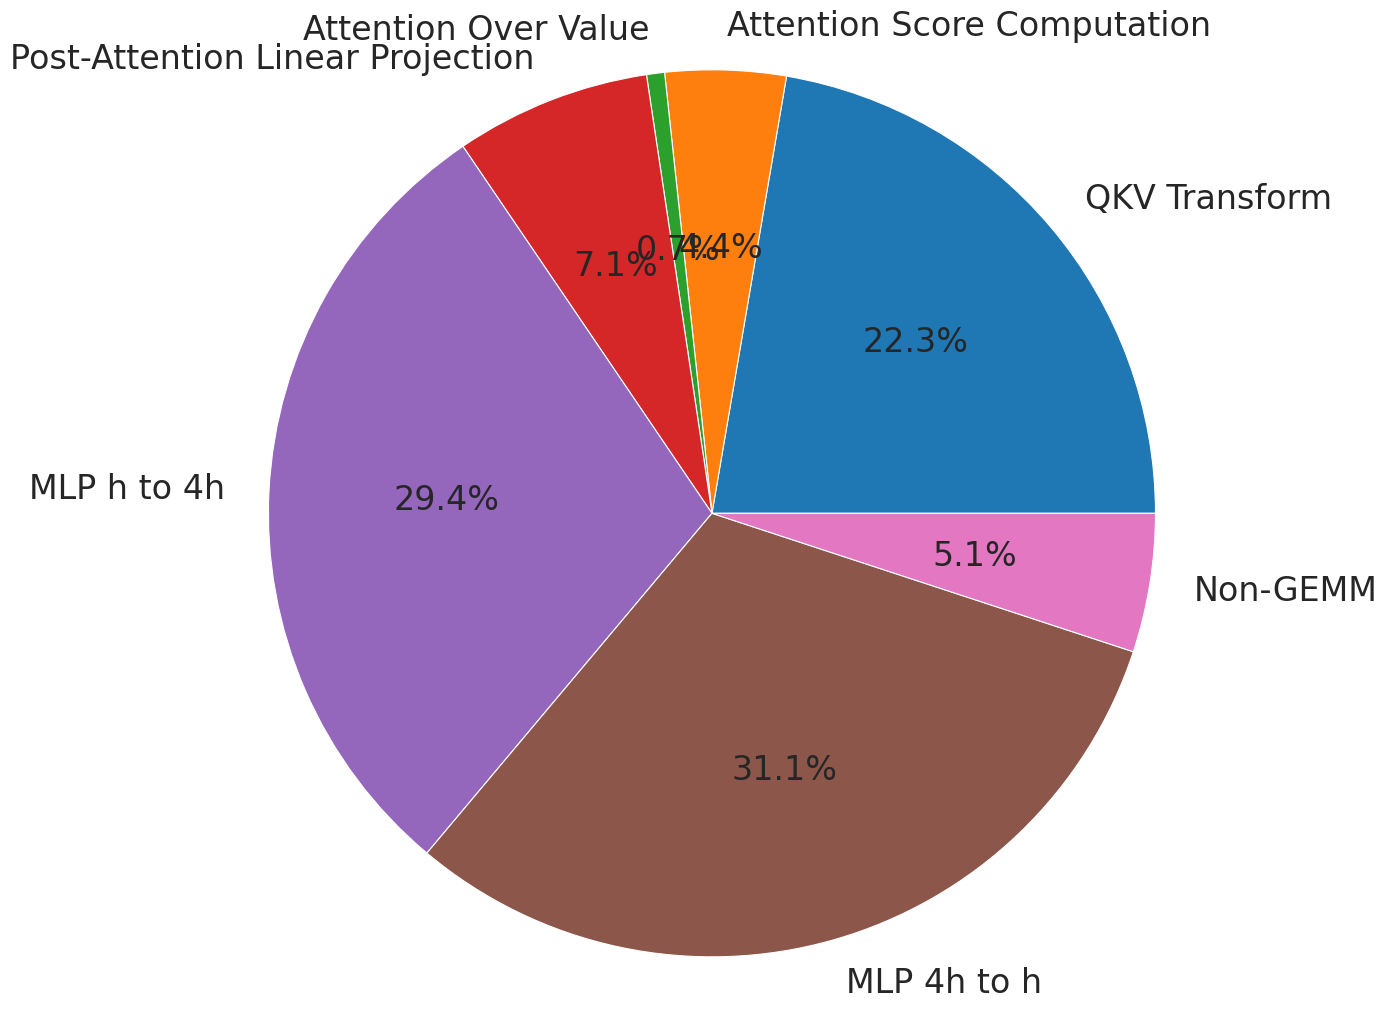

In [6]:
labels = ['QKV Transform', 'Attention Score Computation', 'Attention Over Value', 'Post-Attention Linear Projection', 'MLP h to 4h', 'MLP 4h to h',"Non-GEMM"]
latencies=[]
for key in ['QKV', 'AttScore', 'AOV','AttLinproj','MLP_h_4h','MLP_4h_h']:
    latencies.append(sizes[key])
other = 0
for key in ['AttSoftmax']:
    other+=sizes[key]
for key in ['AttDropout', 'PADropout', 'PAResidual','PostMLPResidual']:
    other+=sizes[key]
for key in ['LN1', 'LN2']:
    other+=sizes[key]
other+=sizes["other"]
latencies.append(other)

fig, ax = plt.subplots()
ax.pie(latencies, autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=3,labels=labels)


In [7]:
def read_logfile(logfile_name):
    values = {}
    value_labels = ['LN1', 'QKV', 'flash',
                    'AttLinproj', 'PADropout', 'PAResidual','LN2','MLP_h_4h','MLP_4h_h',
                    'PostMLPResidual', 'other']
    for x in value_labels:
        values[x]=0
    total=0

    with open(logfile_name, 'r') as f:
        for line in f:
            line = line.strip()

            
            match = re.match(r'LN1: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["LN1"] += latency

            match = re.match(r'QKV Transform: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["QKV"] += latency

            match = re.match(r'Flash: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["flash"] += latency

            match = re.match(r'Attention linproj: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["AttLinproj"] += latency
            
            match = re.match(r'Post-attention Dropout: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["PADropout"] += latency

            match = re.match(r'Post-attention residual: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["PAResidual"] += latency

            match = re.match(r'LN2: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["LN2"] += latency
            
            match = re.match(r'MLP_h_4h: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["MLP_h_4h"] += latency
            
            match = re.match(r'MLP_4h_h: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["MLP_4h_h"] += latency
            
            match = re.match(r'Post-MLP residual: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                values["PostMLPResidual"] += latency

            match = re.match(r'Attention layer time: (\d+\.\d+)', line)
            if match is not None:
                latency = float(match.group(1)) 
                total += latency
    for x in value_labels:
        values[x]/=150
    total /=150
    values['other'] = total - sum(values[item] for item in values)
    return values

11 11 11


/tmp/ipykernel_4019096/1940891939.py:72: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  values['other'] = total - sum(values[item] for item in values)


([<matplotlib.patches.Wedge at 0x7eff15f59eb0>,
 [Text(3.298675559818699, 0.09348556602382295, 'Layer Norm 1'),
  Text(2.883978686488641, 1.6039535329551335, 'QKV Transform'),
  Text(-2.1438072950634153, 2.508802559316473, 'Flash Attention'),
  Text(-2.815221748340939, -1.7217800404430839, 'Post-Attention Linear Projection'),
  Text(-2.343615001723786, -2.3232452999404134, 'Post-attention dropout'),
  Text(-1.9331825095791961, -2.674472917166499, 'Post-attention residual'),
  Text(-1.8090512493761164, -2.759951734565428, 'Layer Norm 2'),
  Text(0.28070733343666565, -3.288039445164075, 'MLP h to 4h'),
  Text(2.836465798877127, -1.6865532223444186, 'MLP 4h to h'),
  Text(3.2526242158482837, -0.557167578451349, 'Post-MLP residual'),
  Text(3.295236672443533, -0.1772435403146634, 'other')],
 [Text(1.7992775780829264, 0.05099212692208524, '0.9%'),
  Text(1.5730792835392586, 0.8748837452482544, '14.4%'),
  Text(-1.1693494336709536, 1.3684377596271666, '42.0%'),
  Text(-1.5355754990950574, -0

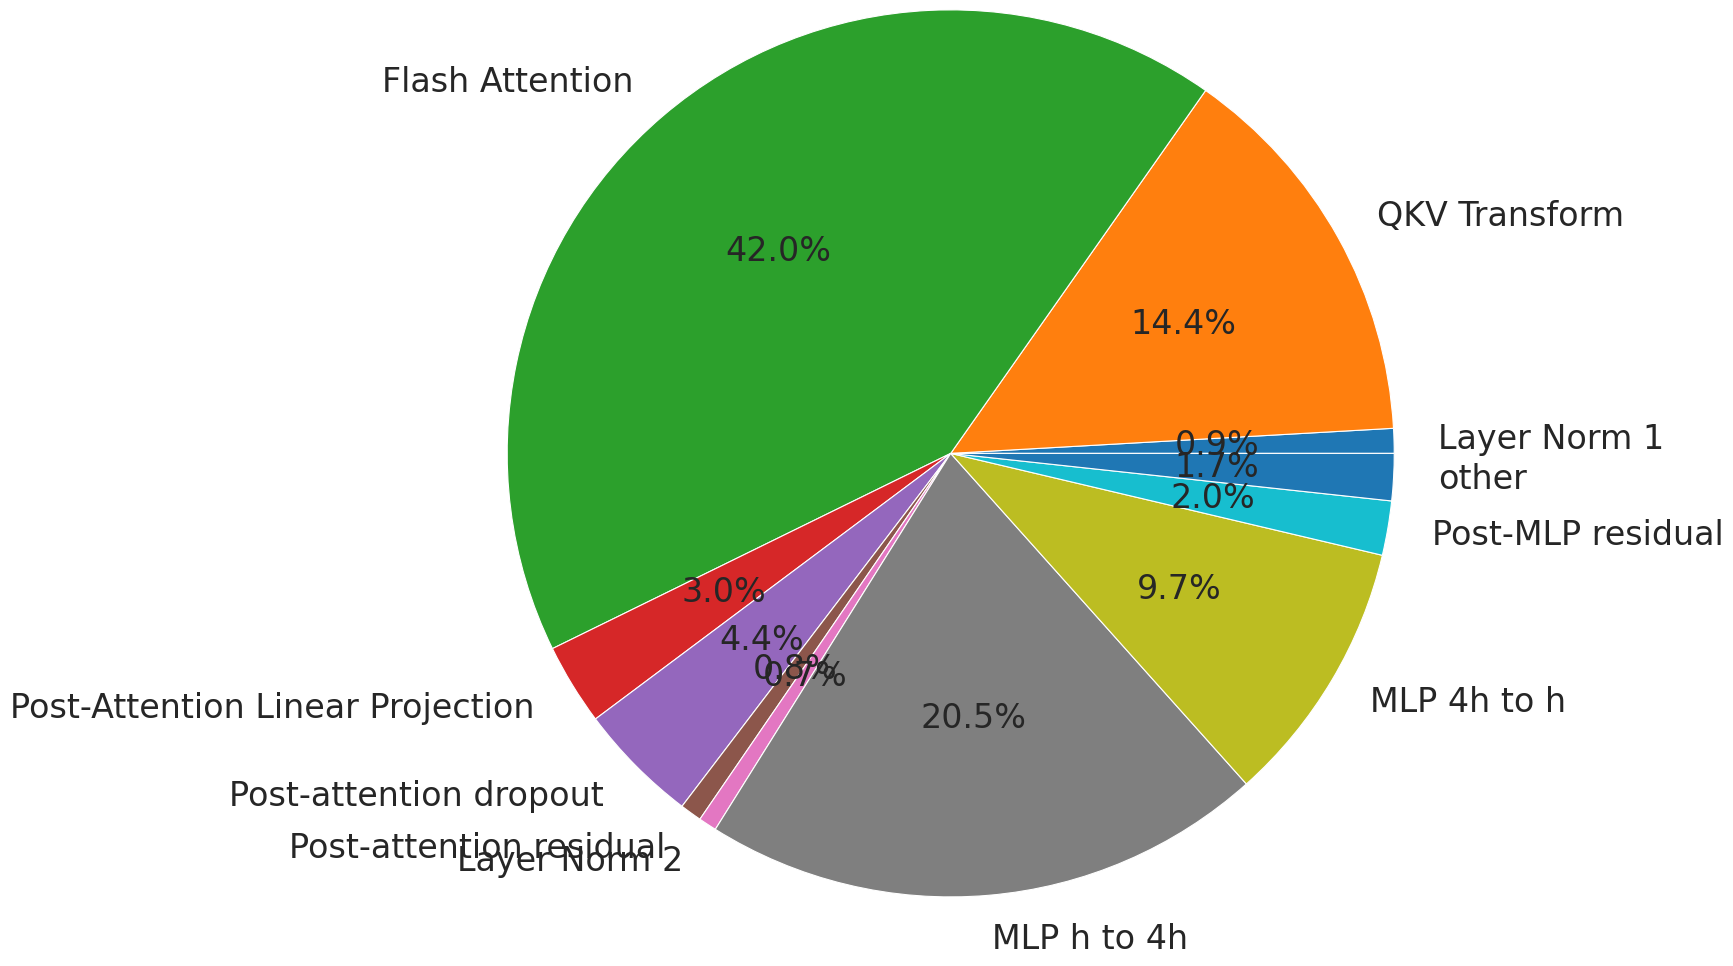

In [8]:
value_labels = ['LN1', 'QKV', 'flash','AttLinproj', 'PADropout', 'PAResidual','LN2','MLP_h_4h','MLP_4h_h','PostMLPResidual', 'other']
labels = ['Layer Norm 1', 'QKV Transform', 'Flash Attention', 'Post-Attention Linear Projection','Post-attention dropout','Post-attention residual', 'Layer Norm 2', 'MLP h to 4h', 'MLP 4h to h','Post-MLP residual','other']

sizes = read_logfile("results/flash_attn_proportion.out")
print(len(value_labels),len(labels),len(sizes))
fig, ax = plt.subplots()
ax.pie(sizes.values(), autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=3,labels=labels)

11 11 11
{'LN1': 0.0007161156336466471, 'QKV': 0.05185301939646403, 'flash': 0.017553319931030275, 'AttLinproj': 0.016544219652811686, 'PADropout': 0.0021175861358642576, 'PAResidual': 0.0006255038579305013, 'LN2': 0.0006952921549479167, 'MLP_h_4h': 0.07201586564381918, 'MLP_4h_h': 0.06922899723052979, 'PostMLPResidual': 0.0018574221928914388, 'other': 0.0008763249715169341}
0.003059229391916733
0.22151489723734216
0.07498737597065591
0.070676522966655
0.009046278900186455
0.002672137985864034
0.0029702719734720166
0.3076501091590568
0.29574467187943154
0.007934864564757886
0.0037436399706615325


/tmp/ipykernel_4019096/1940891939.py:72: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  values['other'] = total - sum(values[item] for item in values)


([<matplotlib.patches.Wedge at 0x7eff158949a0>,
 [Text(3.2998475931501563, 0.03171532722708731, 'Layer Norm 1'),
  Text(2.4915235550657386, 2.163864684898893, 'QKV Transform'),
  Text(-0.2499808801260898, 3.290518129348536, 'Flash Attention'),
  Text(-1.678047807833597, 2.84150586038897, 'Post-Attention Linear Projection'),
  Text(-2.329948423107153, 2.336951079004541, 'Post-attention dropout'),
  Text(-2.4143839388084007, 2.2496111210660463, 'Post-attention residual'),
  Text(-2.4538794928239995, 2.206462198791956, 'Layer Norm 2'),
  Text(-3.2026623748893077, -0.795583881478491, 'MLP h to 4h'),
  Text(1.7760854125181147, -2.7812803899356067, 'MLP 4h to h'),
  Text(3.2961275777582073, -0.1598217480251522, 'Post-MLP residual'),
  Text(3.2997717851698845, -0.03880935192393239, 'other')],
 [Text(1.7999168689909941, 0.017299269396593073, '0.3%'),
  Text(1.3590128482176755, 1.1802898281266687, '22.2%'),
  Text(-0.1363532073415035, 1.7948280705537465, '7.5%'),
  Text(-0.9152988042728709, 1.5

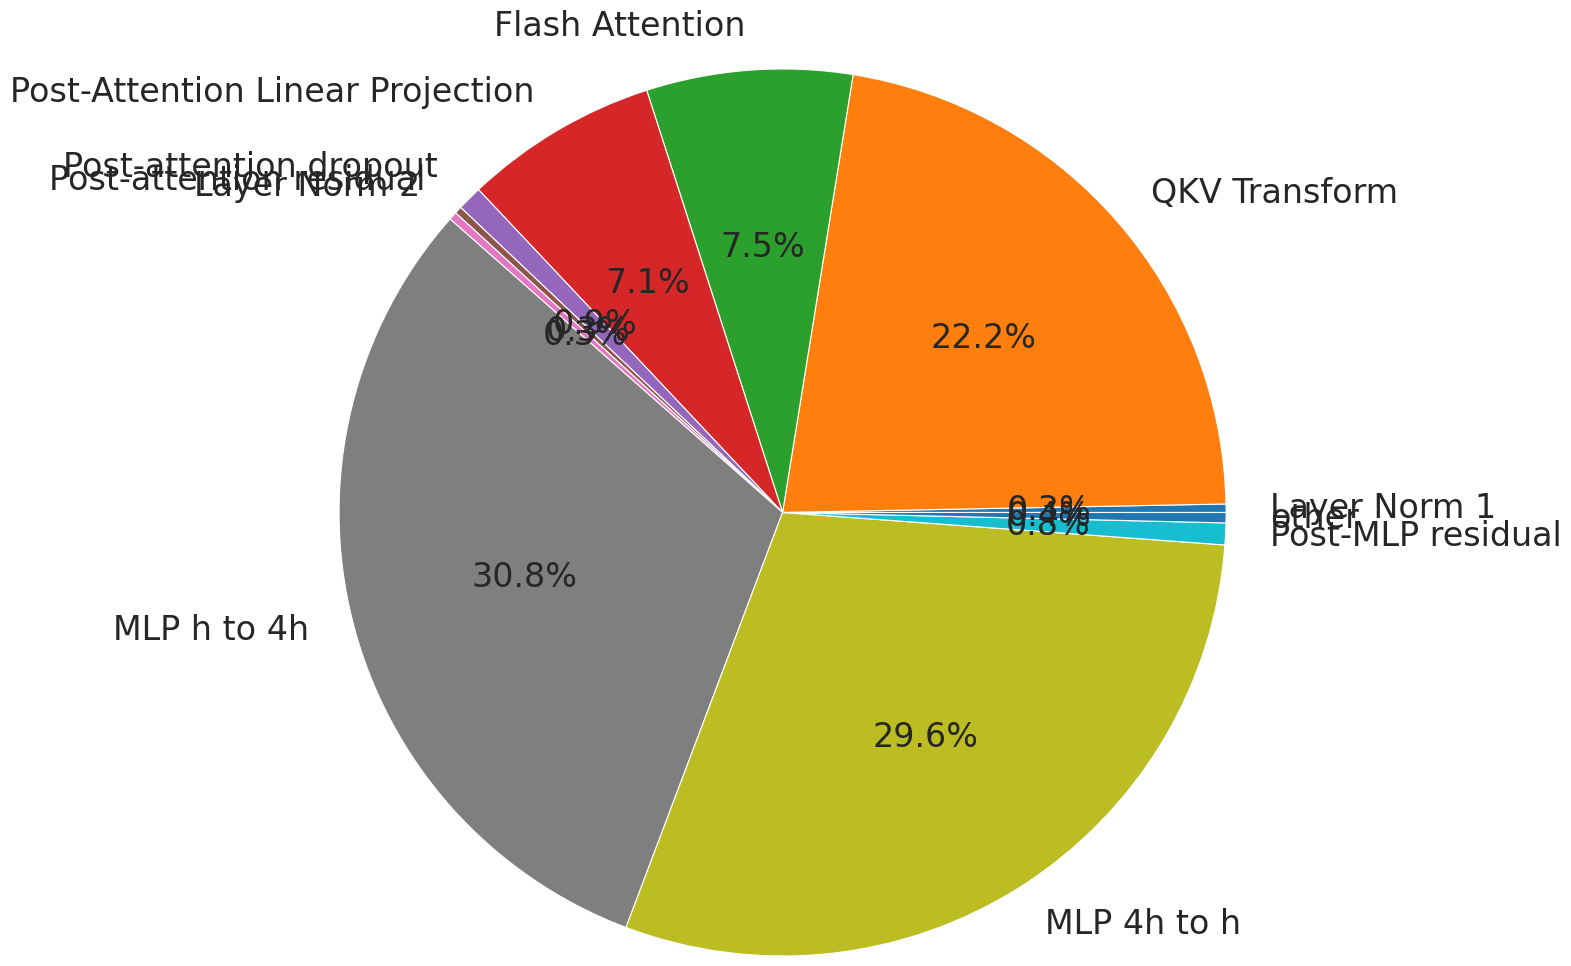

In [14]:
value_labels = ['LN1', 'QKV', 'flash','AttLinproj', 'PADropout', 'PAResidual','LN2','MLP_h_4h','MLP_4h_h','PostMLPResidual', 'other']
labels = ['Layer Norm 1', 'QKV Transform', 'Flash Attention', 'Post-Attention Linear Projection','Post-attention dropout','Post-attention residual', 'Layer Norm 2', 'MLP h to 4h', 'MLP 4h to h','Post-MLP residual','other']

sizes = read_logfile("results/flash_attn_proportion-large.out")
print(len(value_labels),len(labels),len(sizes))
print(sizes)
summ=0
for value in sizes.values():
    summ+=value
for value in sizes.values():
    print(value/summ)
fig, ax = plt.subplots()
ax.pie(sizes.values(), autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=3,labels=labels)

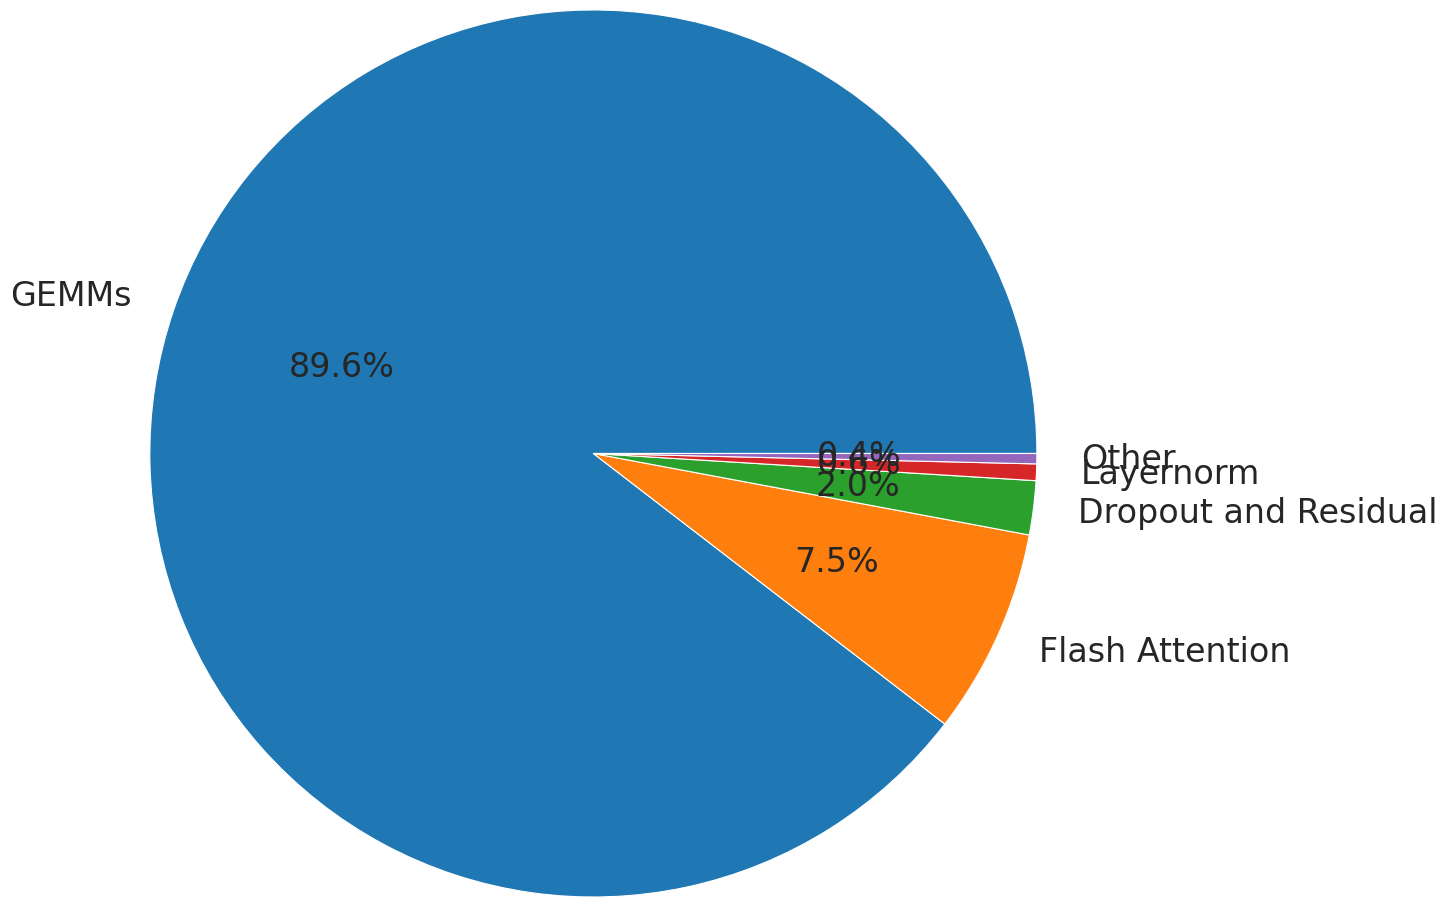

In [10]:
labels = ["GEMMs", "Flash Attention", "Dropout and Residual","Layernorm","Other"]
gemms=0
for key in ['QKV','AttLinproj','MLP_h_4h','MLP_4h_h']:
    gemms+=sizes[key]
softmax = 0
for key in ['flash']:
    softmax+=sizes[key]
drop_res = 0
for key in [ 'PADropout', 'PAResidual','PostMLPResidual']:
    drop_res+=sizes[key]
layernorm=0
for key in ['LN1', 'LN2']:
    layernorm+=sizes[key]

latencies=[gemms,softmax,drop_res,layernorm,sizes["other"]]

fig, ax = plt.subplots()
ax.pie(latencies, autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=3,labels=labels)
plt.savefig("large_gemms_prop_fig.png")

([<matplotlib.patches.Wedge at 0x7eff15d41250>,
 [Text(2.5326539029977915, 2.115576566241472, 'QKV Transform'),
  Text(-0.18668922236144803, 3.2947150308113264, 'Flash Attention'),
  Text(-1.6231225919126921, 2.873233901307484, 'Post-Attention Linear Projection'),
  Text(-3.2713045982901394, -0.4342421273964452, 'MLP h to 4h'),
  Text(1.4555460170320016, -2.9616525441554207, 'MLP 4h to h'),
  Text(3.285908852074911, -0.3046358742100826, 'Non-GEMM')],
 [Text(1.3814475834533404, 1.1539508543135297, '22.2%'),
  Text(-0.10183048492442617, 1.7971172895334506, '7.5%'),
  Text(-0.885339595588741, 1.5672184916222638, '7.1%'),
  Text(-1.7843479627037122, -0.23685934221624277, '30.8%'),
  Text(0.7939341911083644, -1.6154468422665929, '29.6%'),
  Text(1.7923139193135877, -0.16616502229640864, '2.9%')])

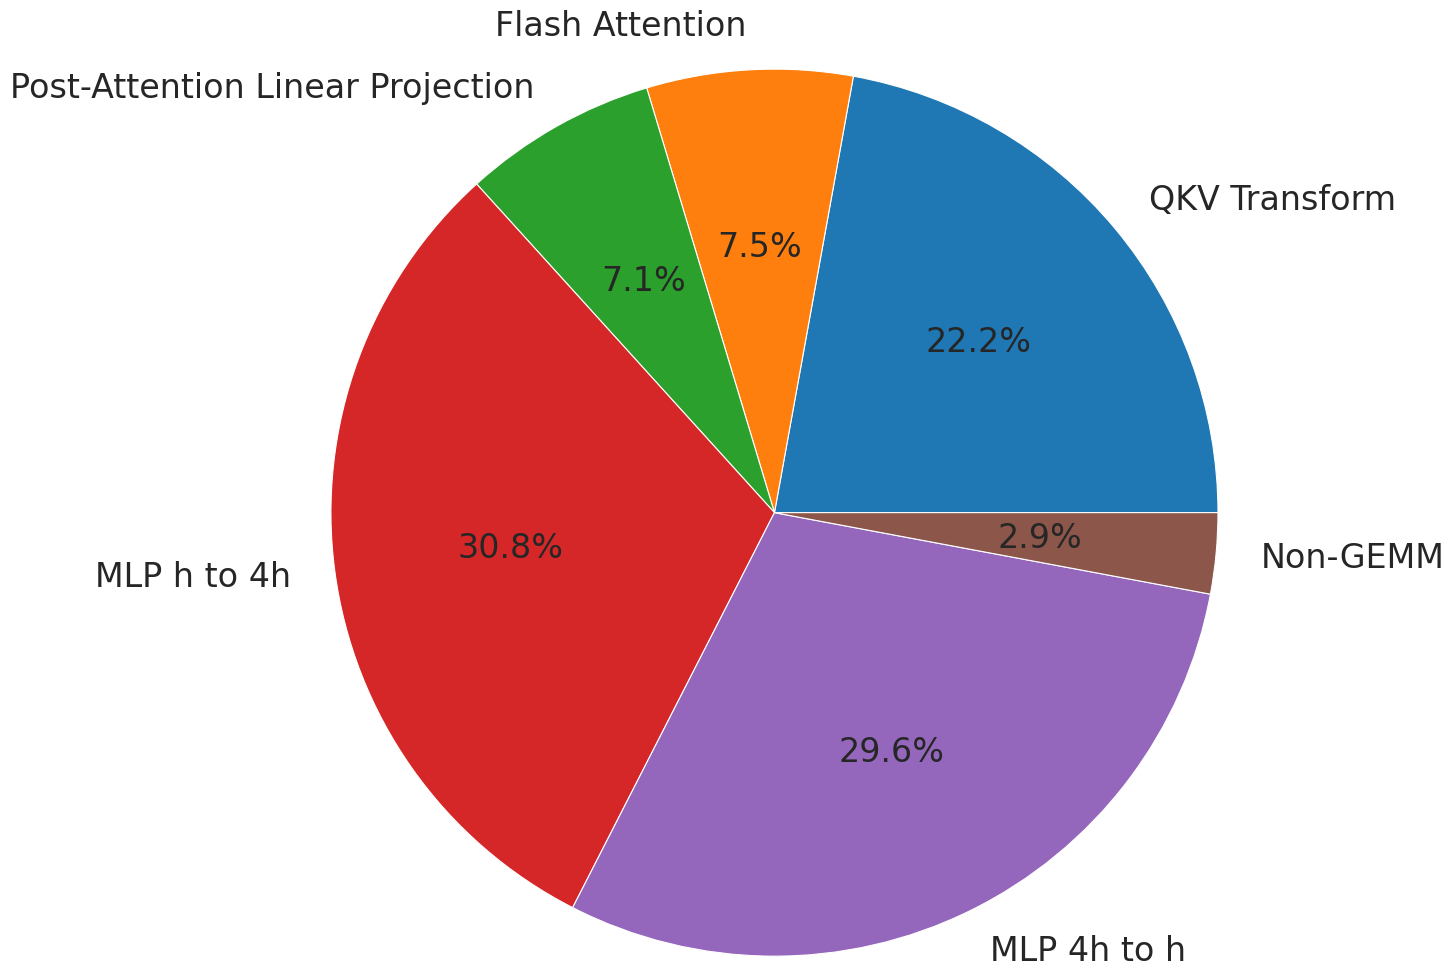

In [11]:
labels = ['QKV Transform', 'Flash Attention', 'Post-Attention Linear Projection', 'MLP h to 4h', 'MLP 4h to h',"Non-GEMM"]
latencies=[]
for key in ['QKV', 'flash','AttLinproj','MLP_h_4h','MLP_4h_h']:
    latencies.append(sizes[key])
other = 0
for key in [ 'PADropout', 'PAResidual','PostMLPResidual']:
    other+=sizes[key]
for key in ['LN1', 'LN2']:
    other+=sizes[key]
other+=sizes["other"]
latencies.append(other)

fig, ax = plt.subplots()
ax.pie(latencies, autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=3,labels=labels)